In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [2]:
df = pd.read_csv('marketing.csv')

In [4]:
df.shape

(548, 6)

In [5]:
df.head()

,MarketID,MarketSize,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,4,3,1,33.73
1,1,Medium,4,3,2,35.67
2,1,Medium,4,3,3,29.03
3,1,Medium,4,3,4,39.25
4,1,Medium,5,2,1,27.81


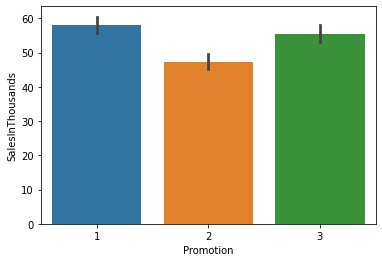

In [6]:
sns.barplot(data = df, x = 'Promotion', y = 'SalesInThousands')

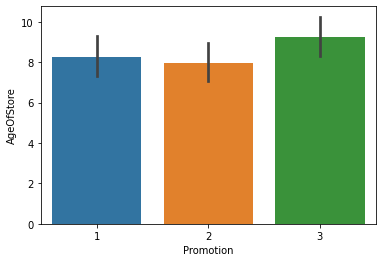

In [7]:
# promotion vs. Age of store

sns.barplot(data = df, x='Promotion', y='AgeOfStore')

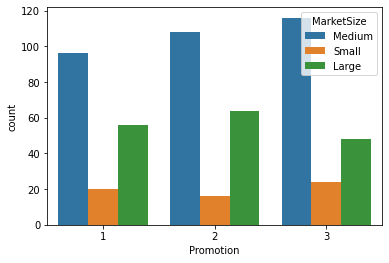

In [12]:
# promotion vs. market size

sns.countplot(data = df, x='Promotion', hue='MarketSize')

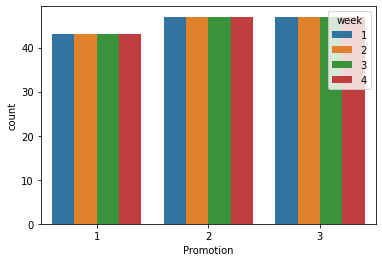

In [14]:
# promotion vs. week

sns.countplot(data = df, x='Promotion', hue='week')

# Hypothesis Testing

### (1) Manual hypothesis testing

Steps:

1. State your hypothesis.
2. Find the mean of revenue (target variable) among the three promotional groups
3. Find the variance of revenue (target variable) among the three promotional groups
4. Find the sample size for each of the promotional groups
5. Compute t-values and p-values for each A/B test (promotion 1 vs. 2, promotion 1 vs. 3, and promotion 2 vs. 3)
6. Make a decision 

**Step 1**: State your hypothesis 

Promotions 1 vs. 2

- $H_0$: promotion 1 and 2 have similar revenues 
- $H_1$: promotion 1 leads to higher revenues than promotion 2 ( I knew the direction by checking the means, see jupyter notebook cell below)

Promotions 1 vs. 3

- $H_0$: promotion 1 and 3 have similar revenues 
- $H_1$: promotion 1 leads to higher revenues than promotion 3

Promotions 2 vs. 3

- $H_0$: promotion 2 and 3 have similar revenues 
- $H_1$: promotion 3 leads to higher revenues than promotion 2

**Step 2**: Find the mean of revenue (target variable) among the three promotional groups

In [15]:
# find means

means = df.groupby('Promotion').mean()['SalesInThousands']
means

Promotion
1    58.099012
2    47.329415
3    55.364468
Name: SalesInThousands, dtype: float64

**Step 3:** Find the variance of revenue (target variable) among the three promotional groups

In [18]:
# find variances

variances = df.groupby('Promotion').var()['SalesInThousands']
variances

Promotion
1    274.027688
2    228.280515
3    281.106494
Name: SalesInThousands, dtype: float64

**Step 4:** Find the sample size for each of the promotional groups

In [20]:
# find sample sizes

sample_sizes = df.groupby('Promotion').count()['SalesInThousands']
sample_sizes

Promotion
1    172
2    188
3    188
Name: SalesInThousands, dtype: int64

**Step 5:** Compute t-values and p-values for each A/B test 

In [30]:
## Promotion 1 vs. 2

t,p = stats.ttest_ind(
                    df.loc[df['Promotion'] == 1, 'SalesInThousands'].values,
                    df.loc[df['Promotion'] == 2, 'SalesInThousands'].values,
                    equal_var = False)

p #less than .05, reject null

4.2903687179871785e-10

In [31]:
## Promotion 1 vs. 3
t,p = stats.ttest_ind(
                    df.loc[df['Promotion'] == 1, 'SalesInThousands'].values,
                    df.loc[df['Promotion'] == 3, 'SalesInThousands'].values,
                    equal_var = False)

p #not enough evidence to reject null 


0.12059147742229478

In [32]:
## Promotion 2 vs. 3
t,p = stats.ttest_ind(
                    df.loc[df['Promotion'] == 2, 'SalesInThousands'].values,
                    df.loc[df['Promotion'] == 3, 'SalesInThousands'].values,
                    equal_var = False)
p #p<.05 reject null again

1.5692733176039892e-06

**Step 6:** Make a decision

Promotion 1 vs. 2: 

We have demonstrated that the marketing performances for these two groups are different and that promotion group  1 outperforms promotion group 2.

Promotion 1 vs. 3:

Promotion groups 1 and 3  outperform promotion group 2, and the difference between them is not statistically significant.